In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [212]:
plt.rcParams
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Obtaining of Dataset

This dataset was obtain from [Kaggle](https://www.kaggle.com/samdeeplearning/vt-nh-real-estate). A local Vermont/New Hampshire real estate firm is looking into modeling closed prices for houses. This dataset contains features of houses in three towns in Vermont, which make up a sizable chunk of the real estate firm's business. MLS is the real estate information platform that is publicly available. Features were exported from an MLS web platform. Features include number of baths, number of bedrooms, and number of acres. There are also categorical features, such as town and address.


### First, let's import the data set and explore its basic information

In [278]:
df = pd.read_csv('../data/train.csv', index_col='id')

In [214]:
df.head(10)

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
1,3,3,1.58,3740,11044.0,538200.0,2.0,591 Church Hill Road,Woodstock,Under,...,14,Yes,No,NaN,No,Unknown,NaN,Interior,Yes,495000
2,4,3,5.19,2276,13438.0,696500.0,2.0,354 Grove Hill Rd,Woodstock,Detached,...,9,Yes,No,NaN,NaN,No,NaN,Walkout,No,540000
3,4,3,0.84,2200,6361.0,329700.0,1.0,4 Prospect,Woodstock,Carport,...,10,Yes,No,NaN,No,No,NaN,Interior,Yes,460000
4,3,3,15.40,2926,11829.0,697600.0,2.0,529 Stage Road,Pomfret,Attached,...,7,Yes,No,Yes,No,Yes,NaN,Interior,Yes,500000
5,4,5,4.00,2817,10707.0,512100.0,2.0,283 Laughlin,Woodstock,Detached,...,6,Yes,No,NaN,NaN,Yes,NaN,Interior,Yes,605914
6,5,3,54.07,4030,NaN,1460710.0,4.0,121 Gills Rd,Barnard,Attached,...,12,Yes,No,NaN,Yes,Yes,NaN,Interior,Yes,1000000
7,4,4,23.80,2780,18277.0,756570.0,0.0,633 North Road,Barnard,NaN,...,9,No,No,NaN,NaN,No,NaN,Interior,Yes,875000
8,3,3,10.33,2200,6708.0,NaN,1.0,700 John Darling Road,Woodstock,Attached,...,7,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,300000
9,4,4,0.29,3324,10459.0,731280.0,0.0,50 NORTH RD,Barnard,NaN,...,11,No,Unknown,NaN,No,Unknown,NaN,Interior,Yes,537500


In [215]:
df.tail()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
133,3,3,8.10,1872,6837.0,337900.0,0.0,24 Austin Road,Woodstock,NaN,...,6,No,No,NaN,No,No,NaN,NaN,No,310000
134,3,2,5.62,2256,6411.0,353600.0,1.0,108 Peterkin Hill Road,Woodstock,Detached,...,10,Yes,Unknown,NaN,No,Unknown,NaN,NaN,Yes,305000
135,6,8,5.50,7783,15867.0,421700.0,0.0,2709 Woodstock Road,Woodstock,NaN,...,11,No,Yes,Yes,No,Yes,NaN,NaN,Yes,415000
136,5,3,58.10,4080,18957.0,1041270.0,2.0,3862 Pomfret Road,Pomfret,Detached,...,10,Yes,No,NaN,Yes,No,NaN,Walk-up,Yes,750000
137,4,4,133.30,3800,23815.0,1367040.0,2.0,216 Galaxy Hill Rd,Pomfret,Attached,...,10,Yes,No,NaN,NaN,Yes,NaN,Interior,Yes,1200000


In [216]:
df.columns

Index(['bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       'tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'address', 'city', 'garage_type', 'year_built', 'total_stories',
       'surveyed', 'seasonal', 'water_body_type', 'water_frontage_length',
       'short_sale', 'rooms_total', 'garage', 'flood_zone', 'easements',
       'current_use', 'covenants', 'common_land_acres', 'basement_access_type',
       'basement', 'price_closed'],
      dtype='object')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 1 to 137
Data columns (total 27 columns):
bedrooms_total           137 non-null int64
baths_total              137 non-null int64
acres                    136 non-null float64
sq_ft_tot_fn             137 non-null int64
tax_gross_amount         131 non-null float64
assessment_value_town    129 non-null float64
garage_capacity          136 non-null float64
address                  137 non-null object
city                     137 non-null object
garage_type              107 non-null object
year_built               137 non-null int64
total_stories            137 non-null float64
surveyed                 137 non-null object
seasonal                 137 non-null object
water_body_type          33 non-null object
water_frontage_length    9 non-null object
short_sale               89 non-null object
rooms_total              137 non-null int64
garage                   137 non-null object
flood_zone               137 non-null object

In [263]:
df.describe()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,year_built,total_stories,rooms_total,common_land_acres,price_closed
count,137.000000,137.000000,136.000000,137.000000,131.000000,1.290000e+02,136.000000,137.000000,137.000000,137.000000,0.0,1.370000e+02
mean,3.620438,3.226277,24.271176,2994.948905,13268.992366,7.286097e+05,1.786765,1930.072993,1.948905,9.226277,NaN,7.361819e+05
std,1.131965,1.322835,60.071667,1299.845683,8494.498958,5.739464e+05,2.123617,75.592915,0.534764,2.659591,NaN,6.670177e+05
min,1.000000,1.000000,0.000000,800.000000,4441.000000,8.990000e+02,0.000000,1780.000000,1.000000,4.000000,NaN,3.000000e+05
25%,3.000000,2.000000,1.082500,2101.000000,7627.000000,3.896000e+05,1.000000,1851.000000,1.500000,7.000000,NaN,3.725000e+05
50%,3.000000,3.000000,5.445000,2817.000000,10476.000000,5.390500e+05,2.000000,1970.000000,2.000000,9.000000,NaN,4.850000e+05
75%,4.000000,4.000000,19.757500,3600.000000,15124.500000,8.349800e+05,2.000000,1995.000000,2.000000,11.000000,NaN,7.500000e+05
max,10.000000,9.000000,563.000000,8600.000000,45702.000000,3.886250e+06,22.000000,2011.000000,4.000000,20.000000,NaN,4.100000e+06


### Let's look at missing data

In [264]:
df.isnull().sum().sort_values(ascending=False)

common_land_acres        137
water_frontage_length    128
easements                118
water_body_type          104
current_use               63
short_sale                48
garage_type               30
basement_access_type      21
assessment_value_town      8
tax_gross_amount           6
basement                   3
acres                      1
garage_capacity            1
city                       0
sq_ft_tot_fn               0
baths_total                0
address                    0
price_closed               0
seasonal                   0
year_built                 0
total_stories              0
surveyed                   0
rooms_total                0
garage                     0
flood_zone                 0
covenants                  0
bedrooms_total             0
dtype: int64

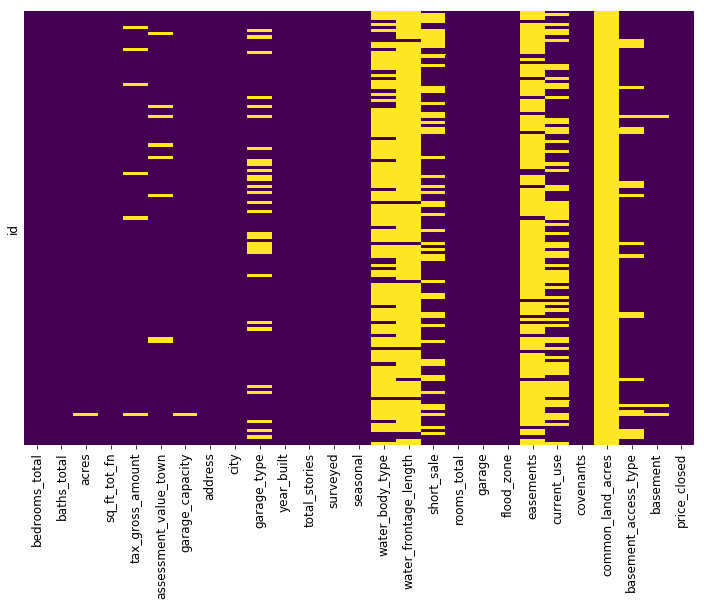

In [220]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As evident from above, these values are most dominant missing features: 
- common_land_acres
- water_frontage_length 
- easements   
- water_body_type  

In [279]:
df = df.drop(['common_land_acres','water_frontage_length','easements','water_body_type'],axis=1)

In [280]:
for col in ['acres','garage_capacity','tax_gross_amount','assessment_value_town']:
    df[col] = df[col].fillna(df[col].mean())

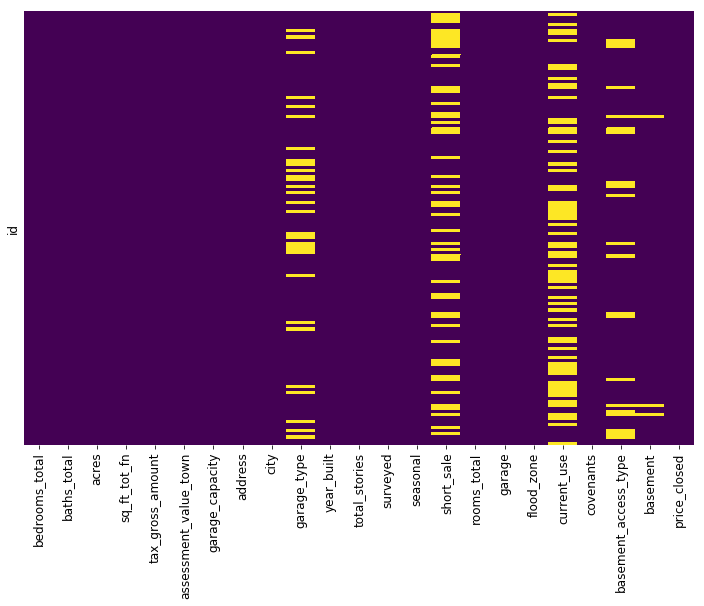

In [281]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [224]:
df[df['basement'].isnull()]

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,seasonal,short_sale,rooms_total,garage,flood_zone,current_use,covenants,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
34,2,2,74.890000,800,4441.000000,728609.689922,0.000000,342 Rolling Ridge Drive,Pomfret,NaN,...,Yes,NaN,4,No,Unknown,Yes,No,NaN,NaN,850000
125,4,3,0.350000,2552,13211.000000,644400.000000,2.000000,10 High Street,Woodstock,Detached,...,No,NaN,12,Yes,No,NaN,Unknown,NaN,NaN,550000
128,3,3,24.271176,2164,13268.992366,112500.000000,1.786765,230 Labounty,Pomfret,Attached,...,No,NaN,7,Yes,No,NaN,No,NaN,NaN,330000


In [225]:
df['basement'].value_counts()

Yes    122
No      12
Name: basement, dtype: int64

In [282]:
df['basement'] = df['basement'].fillna('No')

In [227]:
for col in df.columns:
    if df[col].nunique() < 20: 
        print(df[col].value_counts())

3     61
4     45
5     11
2      9
6      8
1      2
10     1
Name: bedrooms_total, dtype: int64
3    54
2    34
4    27
5    11
1     5
8     2
6     2
9     1
7     1
Name: baths_total, dtype: int64
2.000000     67
0.000000     30
1.000000     20
3.000000     11
4.000000      4
6.000000      3
1.786765      1
22.000000     1
Name: garage_capacity, dtype: int64
Woodstock    99
Pomfret      21
Barnard      17
Name: city, dtype: int64
Attached    66
Detached    29
Under        9
Carport      3
Name: garage_type, dtype: int64
2.00    58
1.50    34
2.50    18
3.00    11
1.00    11
1.75     4
4.00     1
Name: total_stories, dtype: int64
Yes        90
No         25
Unknown    22
Name: surveyed, dtype: int64
No         135
Unknown      1
Yes          1
Name: seasonal, dtype: int64
No    89
Name: short_sale, dtype: int64
9     29
7     20
10    18
8     17
6     14
11    13
12    10
13     4
14     3
5      3
15     2
20     1
19     1
18     1
4      1
Name: rooms_total, dtype: int64
Yes   

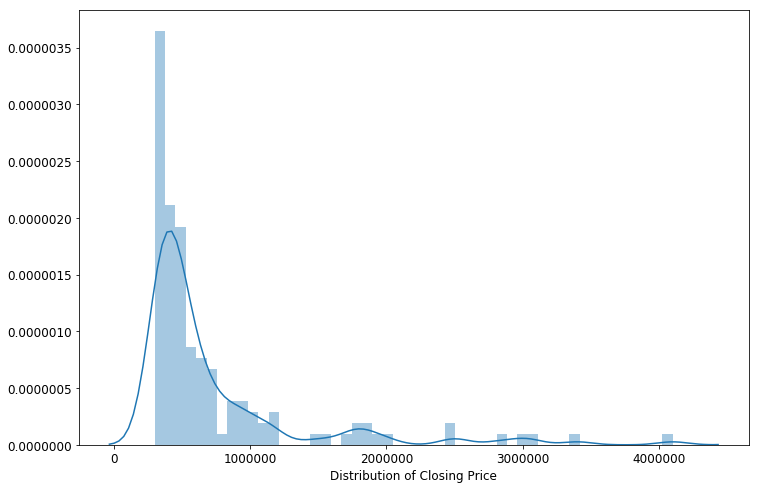

In [228]:
sns.distplot(df['price_closed'],bins=50)
plt.xlabel('Distribution of Closing Price')

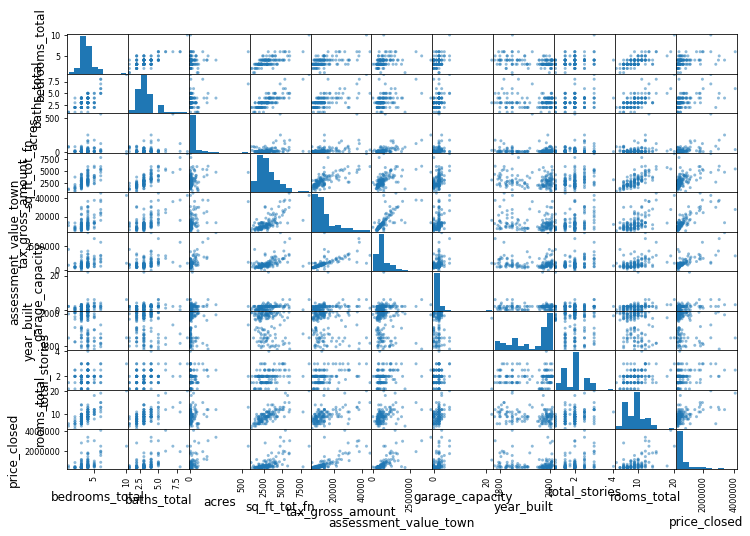

In [229]:
pd.plotting.scatter_matrix(df)
plt.savefig('../images/scatter.png')

In [230]:
df.columns

Index(['bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       'tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'address', 'city', 'garage_type', 'year_built', 'total_stories',
       'surveyed', 'seasonal', 'short_sale', 'rooms_total', 'garage',
       'flood_zone', 'current_use', 'covenants', 'basement_access_type',
       'basement', 'price_closed'],
      dtype='object')

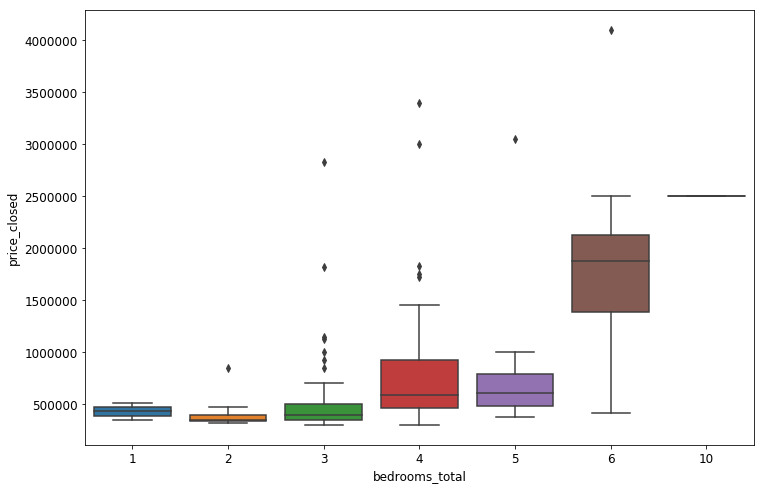

In [231]:
sns.boxplot(x='bedrooms_total',y='price_closed',data=df)

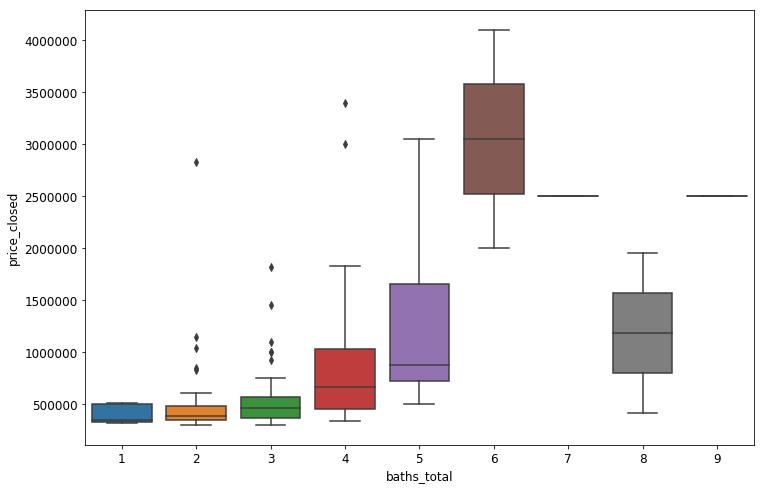

In [232]:
sns.boxplot(x='baths_total',y='price_closed',data=df)

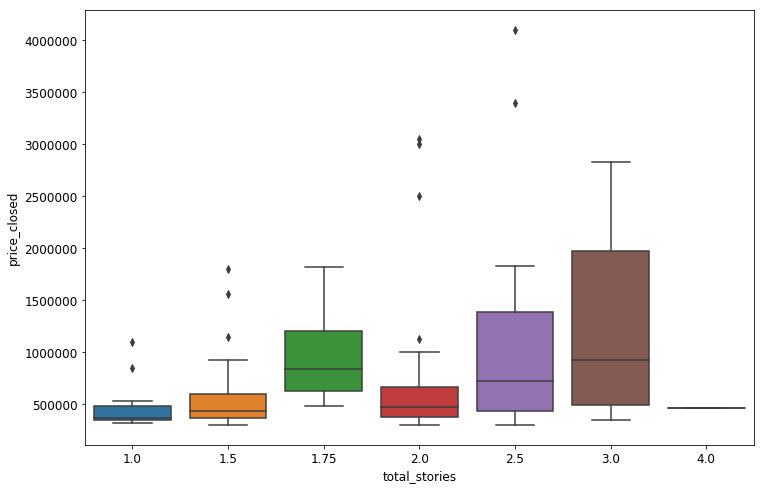

In [233]:
sns.boxplot(x='total_stories',y='price_closed',data=df)

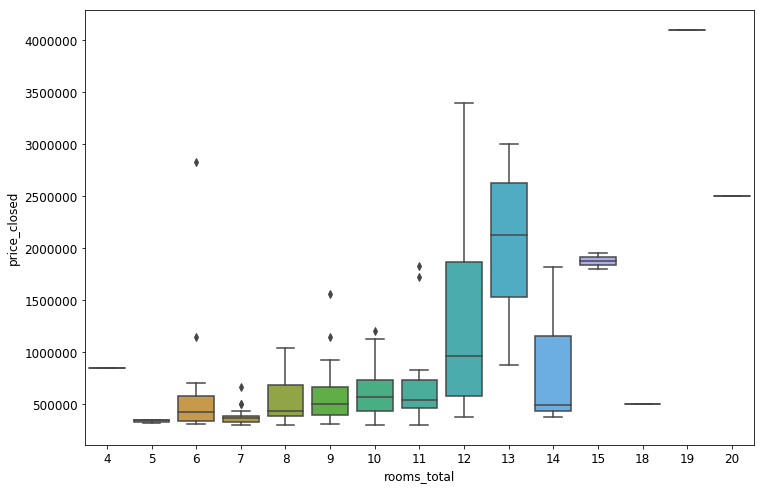

In [234]:
sns.boxplot(x='rooms_total',y='price_closed',data=df)

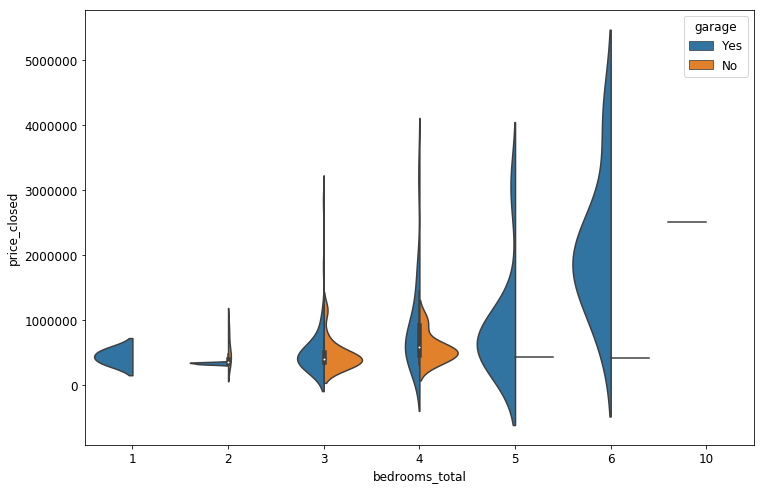

In [235]:
sns.violinplot(x='bedrooms_total',y='price_closed',data=df, hue='garage',split=True)

In [236]:
df_price = df[['acres', 'sq_ft_tot_fn','tax_gross_amount', 'assessment_value_town', 'garage_capacity','rooms_total','price_closed']]

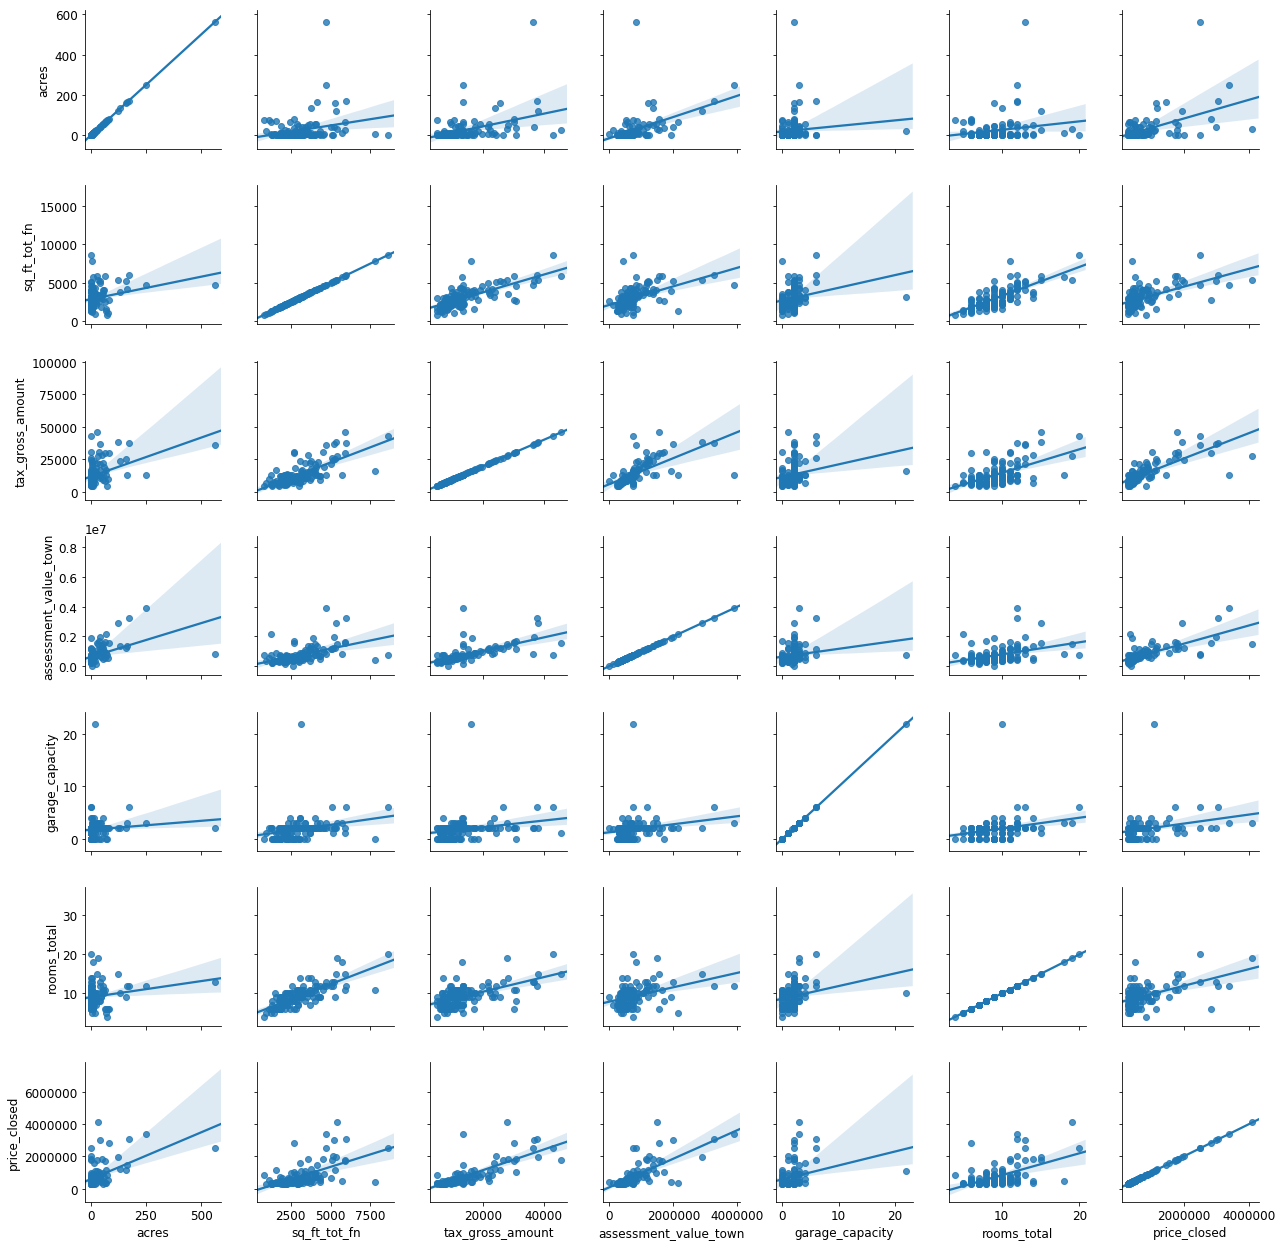

In [237]:
graph = sns.PairGrid(df_price)
graph.map(sns.regplot)

In [238]:
df_price.corr()

,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,rooms_total,price_closed
acres,1.000000,0.270112,0.431542,0.489225,0.097216,0.186268,0.519515
sq_ft_tot_fn,0.270112,1.000000,0.731552,0.518023,0.268353,0.770216,0.601268
tax_gross_amount,0.431542,0.731552,1.000000,0.670449,0.246857,0.578385,0.786106
assessment_value_town,0.489225,0.518023,0.670449,1.000000,0.201882,0.387625,0.737226
garage_capacity,0.097216,0.268353,0.246857,0.201882,1.000000,0.258773,0.273339
rooms_total,0.186268,0.770216,0.578385,0.387625,0.258773,1.000000,0.538958
price_closed,0.519515,0.601268,0.786106,0.737226,0.273339,0.538958,1.000000


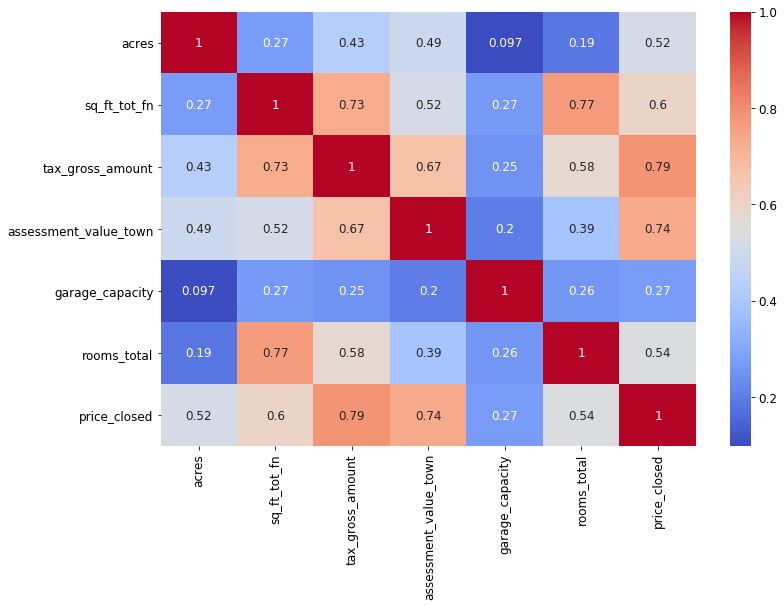

In [239]:
sns.heatmap(df_price.corr(),annot=True,cmap='coolwarm')

In [240]:
df.iloc[0]

bedrooms_total                              3
baths_total                                 3
acres                                    1.58
sq_ft_tot_fn                             3740
tax_gross_amount                        11044
assessment_value_town                  538200
garage_capacity                             2
address                  591 Church Hill Road
city                                Woodstock
garage_type                             Under
year_built                               1970
total_stories                               2
surveyed                                  Yes
seasonal                                   No
short_sale                                 No
rooms_total                                14
garage                                    Yes
flood_zone                                 No
current_use                                No
covenants                             Unknown
basement_access_type                 Interior
basement                          

In [283]:
city = pd.get_dummies(df.city,prefix='city_',drop_first=True)
city.head()

,city__Pomfret,city__Woodstock
id,,
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1


In [284]:
covenants = pd.get_dummies(df.covenants,prefix='covenants_',drop_first=True)
covenants.head()

,covenants__Unknown,covenants__Yes
id,,
1,1,0
2,0,0
3,0,0
4,0,1
5,0,1


In [285]:
df['flood_zone']= df['flood_zone'].map({'No':0,'Yes':1,'Unknown':1})

In [286]:
df['current_use']= df['current_use'].map({'No':0,'Yes':1,'Unknown':1})

In [287]:
df['basement']= df['basement'].map({'No':0,'Yes':1})

In [288]:
df['garage']= df['garage'].map({'No':0,'Yes':1})

In [252]:
from sklearn.model_selection import train_test_split

In [290]:
df = pd.concat([df,city,covenants],axis=1)

In [291]:
df.columns

Index(['bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       'tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'address', 'city', 'garage_type', 'year_built', 'total_stories',
       'surveyed', 'seasonal', 'short_sale', 'rooms_total', 'garage',
       'flood_zone', 'current_use', 'covenants', 'basement_access_type',
       'basement', 'price_closed', 'city__Pomfret', 'city__Woodstock',
       'covenants__Unknown', 'covenants__Yes'],
      dtype='object')

In [292]:
X = df[['bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       'tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'year_built', 'total_stories',
       'rooms_total', 'garage',
       'flood_zone',
       'basement', 'price_closed', 'city__Pomfret', 'city__Woodstock',
       'covenants__Unknown', 'covenants__Yes']]
y = df['price_closed']

In [274]:
X.describe()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,year_built,total_stories,rooms_total,garage,flood_zone,basement,price_closed,city__Pomfret,city__Woodstock,covenants__Unknown,covenants__Yes
count,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,0.0,0.0,1.370000e+02,137.000000,137.000000,137.000000,137.000000
mean,3.620438,3.226277,24.271176,2994.948905,13268.992366,7.286097e+05,1.786765,1930.072993,1.948905,9.226277,0.781022,NaN,NaN,7.361819e+05,0.153285,0.722628,0.138686,0.233577
std,1.131965,1.322835,59.850407,1299.845683,8305.006742,5.568098e+05,2.115795,75.592915,0.534764,2.659591,0.415071,NaN,NaN,6.670177e+05,0.361584,0.449345,0.346887,0.424659
min,1.000000,1.000000,0.000000,800.000000,4441.000000,8.990000e+02,0.000000,1780.000000,1.000000,4.000000,0.000000,NaN,NaN,3.000000e+05,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.090000,2101.000000,7643.000000,3.933000e+05,1.000000,1851.000000,1.500000,7.000000,1.000000,NaN,NaN,3.725000e+05,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,5.500000,2817.000000,10727.000000,5.535200e+05,2.000000,1970.000000,2.000000,9.000000,1.000000,NaN,NaN,4.850000e+05,0.000000,1.000000,0.000000,0.000000
75%,4.000000,4.000000,20.020000,3600.000000,14691.000000,8.321000e+05,2.000000,1995.000000,2.000000,11.000000,1.000000,NaN,NaN,7.500000e+05,0.000000,1.000000,0.000000,0.000000
max,10.000000,9.000000,563.000000,8600.000000,45702.000000,3.886250e+06,22.000000,2011.000000,4.000000,20.000000,1.000000,NaN,NaN,4.100000e+06,1.000000,1.000000,1.000000,1.000000


In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 1 to 137
Data columns (total 18 columns):
bedrooms_total           137 non-null int64
baths_total              137 non-null int64
acres                    137 non-null float64
sq_ft_tot_fn             137 non-null int64
tax_gross_amount         137 non-null float64
assessment_value_town    137 non-null float64
garage_capacity          137 non-null float64
year_built               137 non-null int64
total_stories            137 non-null float64
rooms_total              137 non-null int64
garage                   137 non-null int64
flood_zone               137 non-null int64
basement                 137 non-null int64
price_closed             137 non-null int64
city__Pomfret            137 non-null uint8
city__Woodstock          137 non-null uint8
covenants__Unknown       137 non-null uint8
covenants__Yes           137 non-null uint8
dtypes: float64(5), int64(9), uint8(4)
memory usage: 16.6 KB


In [260]:
X.isnull().sum()

bedrooms_total             0
baths_total                0
acres                      0
sq_ft_tot_fn               0
tax_gross_amount           0
assessment_value_town      0
garage_capacity            0
year_built                 0
total_stories              0
rooms_total                0
garage                     0
flood_zone               137
basement                 137
price_closed               0
city__Pomfret              0
city__Woodstock            0
covenants__Unknown         0
covenants__Yes             0
dtype: int64

In [110]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
prediction = lm.predict(X_test)

In [114]:
from sklearn import metrics

In [149]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

MAE: 3.6795557077441895e-10
MSE: 3.626511061315912e-19
RMSE: 6.02205202677286e-10


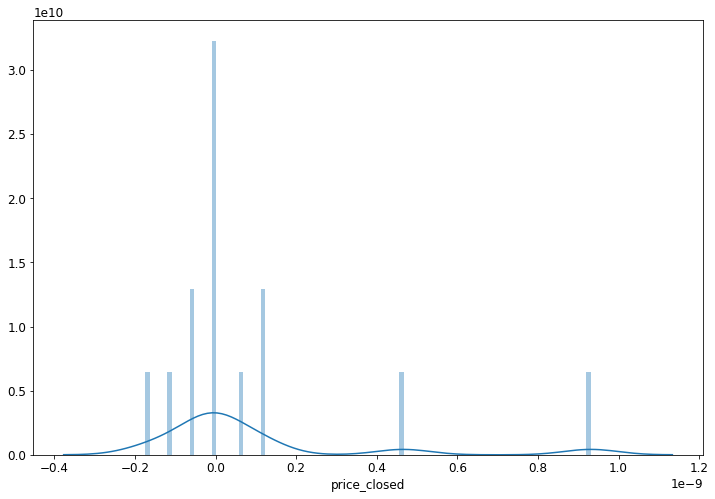

In [92]:
sns.distplot((y_test-prediction),bins=100)

In [93]:
lm.coef_
df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
df

,Coefficient
bedrooms_total,8.157036e-11
baths_total,-2.521716e-11
acres,-3.409883e-12
sq_ft_tot_fn,-9.899026e-14
tax_gross_amount,5.468716e-15
assessment_value_town,7.179790e-17
garage_capacity,2.812805e-11
year_built,-3.228082e-13
total_stories,2.249992e-11
rooms_total,4.415656e-12


In [118]:
from sklearn.cross_validation import cross_val_score
mse_scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print ((-mse_scores).mean())

2.28188814379e-19


In [119]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
np.sqrt(metrics.mean_squared_error(y_test, y_null))

649444.99460724776

In [154]:
df2 = pd.read_csv('../data/test.csv', index_col='id')
df2.head()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
207,4,4,10.16,2804,10425.0,498600.0,2,3101 Hartland Hill Road,Woodstock,Detached,...,9,Yes,No,NaN,No,No,NaN,Interior,Yes,NaN
208,3,3,0.00,4295,13345.0,691700.0,2,1670 Church Hill Road,Woodstock,Under,...,13,Yes,No,NaN,Yes,Yes,NaN,Walkout,No,NaN
209,3,4,0.34,2952,9299.0,NaN,1,10 Linden Hill,Woodstock,Under,...,9,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,NaN
210,4,2,0.59,2310,10274.0,398400.0,1,26 Pleasant Street,Woodstock,Attached,...,9,Yes,Unknown,NaN,No,No,NaN,NaN,Yes,NaN
211,3,2,9.00,2668,6384.0,350680.0,2,75 Rudge Road,Pomfret,Attached,...,8,Yes,No,NaN,NaN,No,NaN,Walkout,No,NaN


In [162]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 207 to 229
Data columns (total 23 columns):
bedrooms_total           23 non-null int64
baths_total              23 non-null int64
acres                    23 non-null float64
sq_ft_tot_fn             23 non-null int64
 tax_gross_amount        22 non-null float64
assessment_value_town    20 non-null float64
garage_capacity          23 non-null int64
address                  23 non-null object
city                     23 non-null object
garage_type              17 non-null object
year_built               23 non-null int64
total_stories            23 non-null float64
surveyed                 23 non-null object
seasonal                 23 non-null object
short_sale               10 non-null object
rooms_total              23 non-null int64
garage                   23 non-null object
flood_zone               23 non-null object
current_use              13 non-null object
covenants                23 non-null object
basement_access_

In [167]:
df3 = df3.drop(['common_land_acres','water_frontage_length','easements','water_body_type'],axis=1)

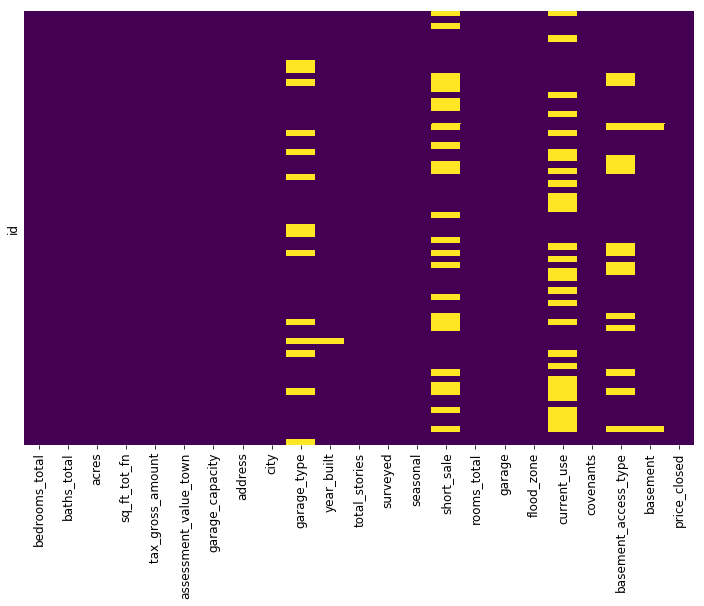

In [192]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [171]:
for col in ['acres','garage_capacity',' tax_gross_amount','assessment_value_town']:
    df3[col] = df3[col].fillna(df3[col].mean())

In [172]:
for col in df3.columns:
    if df3[col].nunique() < 20: 
        print(df3[col].value_counts())

3    30
4    17
5    13
6     3
2     3
7     2
1     1
Name: bedrooms_total, dtype: int64
3    31
4    16
2    12
5     5
8     3
1     2
Name: baths_total, dtype: int64
2    36
0    14
3     9
1     8
5     1
4     1
Name: garage_capacity, dtype: int64
Woodstock    51
Barnard      14
Pomfret       4
Name: city, dtype: int64
Attached    27
Detached    24
Under        3
Carport      1
Name: garage_type, dtype: int64
2.00    32
1.50    21
2.50     6
1.75     5
3.00     3
1.00     2
Name: total_stories, dtype: int64
Yes        49
Unknown    14
No          6
Name: surveyed, dtype: int64
No         67
Yes         1
Unknown     1
Name: seasonal, dtype: int64
No    45
Name: short_sale, dtype: int64
10    11
9     11
6     10
7      7
12     6
11     6
8      6
15     3
5      3
13     2
20     1
17     1
14     1
4      1
Name: rooms_total, dtype: int64
Yes    55
No     14
Name: garage, dtype: int64
No         56
Unknown    10
Yes         3
Name: flood_zone, dtype: int64
No         31
Yes   

In [161]:
len(df2['flood_zone'])

23

In [173]:
city3 = pd.get_dummies(df3.city,prefix='city_',drop_first=True)
covenants3 = pd.get_dummies(df3.covenants,prefix='covenants_',drop_first=True)

# df2['basement']= df2['basement'].map({'No':0,'Yes':1})
# df2['garage']= df2['garage'].map({'No':0,'Yes':1})
# df2 = pd.concat([df2,city2,covenants2],axis=1)

In [174]:
df3['flood_zone']= df3['flood_zone'].map({'No':0,'Yes':1,'Unknown':1})
df3['current_use']= df3['current_use'].map({'No':0,'Yes':1,'Unknown':1})


# df2 = pd.concat([df2,city2,covenants2],axis=1)

In [176]:
df3['basement']= df3['basement'].map({'No':0,'Yes':1})
df3['garage']= df3['garage'].map({'No':0,'Yes':1})

In [177]:
df3.head()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,seasonal,short_sale,rooms_total,garage,flood_zone,current_use,covenants,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
138,3,3,0.75,1765,6392.00000,305700.0,1,25 Prospect Street,Woodstock,Attached,...,No,NaN,8,NaN,0,NaN,No,Walkout,NaN,329000
139,5,4,88.80,5564,12360.31746,6575800.0,2,9501 Sincerbeaux,Woodstock,Detached,...,No,No,11,NaN,0,1.0,Yes,Walkout,NaN,3000000
140,4,4,12.00,4163,12360.31746,770040.0,2,5685 Route 12,Barnard,Attached,...,No,NaN,11,NaN,0,0.0,No,Walkout,NaN,775000
141,5,5,53.90,6648,17519.00000,917830.0,3,16 Midsomer Meadows Lane,Barnard,Attached,...,No,No,15,NaN,0,0.0,No,Interior,NaN,550000
142,4,5,6.40,4734,23339.00000,1135100.0,2,1043 Noah Wood Road,Woodstock,Detached,...,No,No,12,NaN,0,NaN,No,Walkout,NaN,1090000


In [132]:
X = df2[['bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       ' tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'year_built', 'total_stories',
       'rooms_total', 'garage',
       'flood_zone',
       'basement', 'price_closed', 'city__Pomfret', 'city__Woodstock',
       'covenants__Unknown', 'covenants__Yes']]

In [188]:
df3 = pd.read_csv('../data/validate.csv', index_col='id')

In [189]:
df3.head()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
138,3,3,0.75,1765,6392.0,305700.0,1,25 Prospect Street,Woodstock,Attached,...,8,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,329000
139,5,4,88.80,5564,NaN,6575800.0,2,9501 Sincerbeaux,Woodstock,Detached,...,11,Yes,No,Yes,Yes,Yes,NaN,Walkout,Yes,3000000
140,4,4,12.00,4163,NaN,770040.0,2,5685 Route 12,Barnard,Attached,...,11,Yes,No,NaN,No,No,NaN,Walkout,Yes,775000
141,5,5,53.90,6648,17519.0,917830.0,3,16 Midsomer Meadows Lane,Barnard,Attached,...,15,Yes,No,NaN,No,No,NaN,Interior,Yes,550000
142,4,5,6.40,4734,23339.0,1135100.0,2,1043 Noah Wood Road,Woodstock,Detached,...,12,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,1090000


In [190]:
df3 = df3.drop(['common_land_acres','water_frontage_length','easements','water_body_type'],axis=1)
for col in ['acres','garage_capacity',' tax_gross_amount','assessment_value_town']:
    df3[col] = df3[col].fillna(df3[col].mean())
city3 = pd.get_dummies(df3.city,prefix='city_',drop_first=True)
covenants3 = pd.get_dummies(df3.covenants,prefix='covenants_',drop_first=True)
df3['flood_zone']= df3['flood_zone'].map({'No':0,'Yes':1,'Unknown':1})
df3['current_use']= df3['current_use'].map({'No':0,'Yes':1,'Unknown':1})
df3['basement']= df3['basement'].map({'No':0,'Yes':1})
df3['garage']= df3['garage'].map({'No':0,'Yes':1})

In [191]:
df3.head()

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,garage_type,...,seasonal,short_sale,rooms_total,garage,flood_zone,current_use,covenants,basement_access_type,basement,price_closed
id,,,,,,,,,,,,,,,,,,,,,
138,3,3,0.75,1765,6392.00000,305700.0,1,25 Prospect Street,Woodstock,Attached,...,No,NaN,8,1,0,NaN,No,Walkout,1.0,329000
139,5,4,88.80,5564,12360.31746,6575800.0,2,9501 Sincerbeaux,Woodstock,Detached,...,No,No,11,1,0,1.0,Yes,Walkout,1.0,3000000
140,4,4,12.00,4163,12360.31746,770040.0,2,5685 Route 12,Barnard,Attached,...,No,NaN,11,1,0,0.0,No,Walkout,1.0,775000
141,5,5,53.90,6648,17519.00000,917830.0,3,16 Midsomer Meadows Lane,Barnard,Attached,...,No,No,15,1,0,0.0,No,Interior,1.0,550000
142,4,5,6.40,4734,23339.00000,1135100.0,2,1043 Noah Wood Road,Woodstock,Detached,...,No,No,12,1,0,NaN,No,Walkout,1.0,1090000


In [193]:
df3 = pd.concat([df3,city3,covenants3],axis=1)

In [196]:
X3 = df3[['bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       ' tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'year_built', 'total_stories',
       'rooms_total', 'garage',
       'flood_zone',
       'basement', 'price_closed', 'city__Pomfret', 'city__Woodstock',
       'covenants__Unknown', 'covenants__Yes']]
y3 = df3['price_closed']

In [205]:
X3['basement'] = X3['basement'].fillna(1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [206]:
X3.isnull().sum()

bedrooms_total           0
baths_total              0
acres                    0
sq_ft_tot_fn             0
 tax_gross_amount        0
assessment_value_town    0
garage_capacity          0
year_built               0
total_stories            0
rooms_total              0
garage                   0
flood_zone               0
basement                 0
price_closed             0
city__Pomfret            0
city__Woodstock          0
covenants__Unknown       0
covenants__Yes           0
dtype: int64

In [294]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [295]:
from sklearn.cross_validation import cross_val_score
mse_scores = cross_val_score(lm, X3, y3, cv=20, scoring='neg_mean_squared_error')
print ((-mse_scores).mean())

4.84926362303e-19
